<span style="font-size: 30px;"><b>Model Evaluation (XGBoost)</b></span>

<b>Importing and Loading Data</b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
from xgboost import XGBClassifier

X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

<b>Train the Best Model (XGBoost)</b>

In [7]:
best_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

best_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:42:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

<b>Predictions</b>

In [10]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

<b>ROC curve</b>

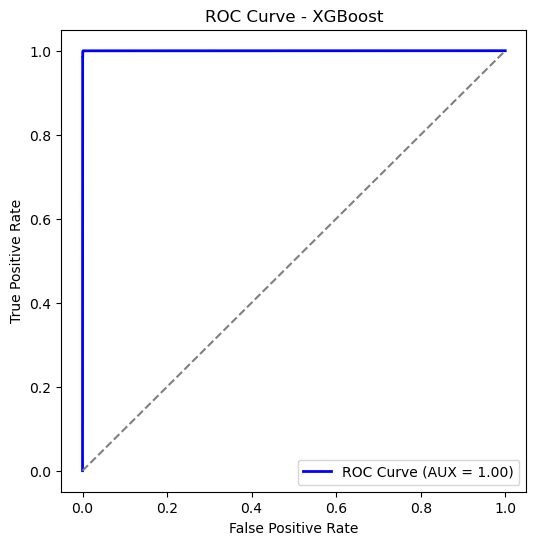

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUX = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()

<b>Precision-Recall Curve</b>

Text(0.5, 1.0, 'Precision-Recall Curve - XGBoost')

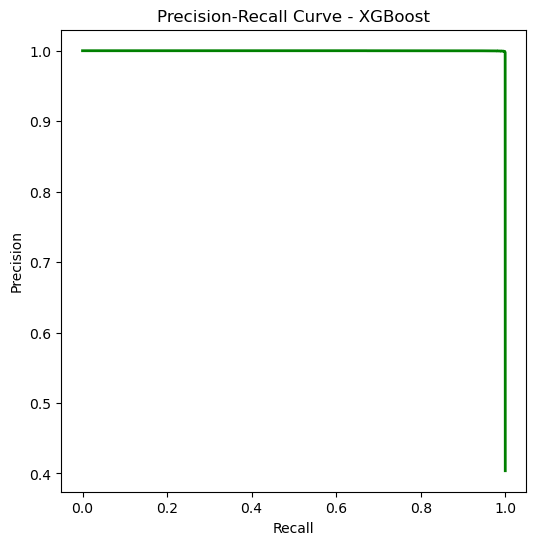

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, color="green", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")

<b>Confusion Matrix</b>

Text(0.5, 1.0, 'Confusion Matrix - XGBoost')

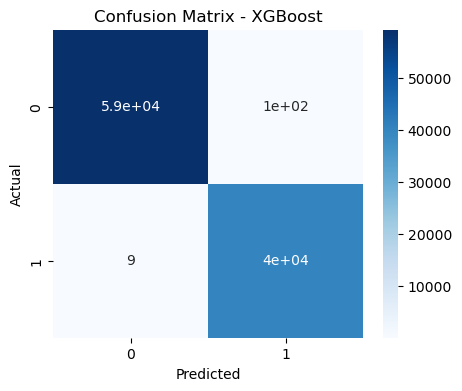

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")

<b>Feature Importance (XGBoost)</b>

Text(0.5, 1.0, 'Top 15 Feature Importances - XGBoost')

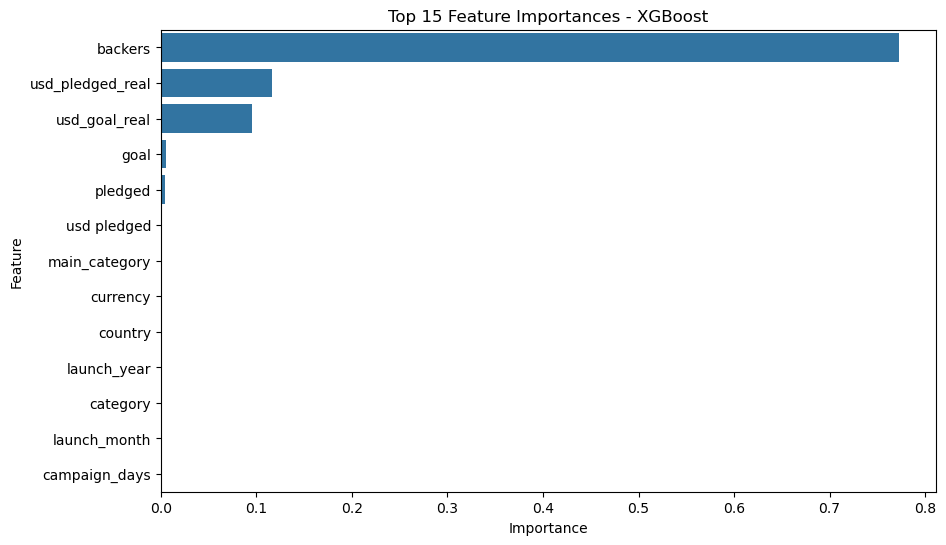

In [22]:
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance" : best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importances.head(15), x="Importance", y="Feature")
plt.title("Top 15 Feature Importances - XGBoost")

<b>Final Report</b>

In [27]:
print("Classification Report - XGBoost: \n", classification_report(y_test, y_pred))
print(f"ROC AOC: {roc_auc:.4f}")

Classification Report - XGBoost: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     59284
           1       1.00      1.00      1.00     40155

    accuracy                           1.00     99439
   macro avg       1.00      1.00      1.00     99439
weighted avg       1.00      1.00      1.00     99439

ROC AOC: 1.0000


<b>This concludes the Project. Refer to Final_Report.pdf in <code>outputs</code> folder.</b>